In [4]:
!python -m pip install mitoinstaller
!python -m mitoinstaller install

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
Starting install...
Create mito user
Upgrading mitoinstaller
Checking dependencies
Installing mitosheet3
Creating a Mitosheet starter notebook
Start JupyterLab
Finish Installation

----------------------------------------------------------------------------
Mito has finished installing

Please shut down the currently running JupyterLab and relaunch it to enable Mito

Then render a mitosheet following the instructions here: https://docs.trymito.io/how-to/creating-a-mitosheet
-

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from pathlib import Path
# from pandas_profiling import ProfileReport
data_dir = Path("./data")

<div style="background-color: #f0f0f0; padding: 10px; border: 2px solid #4a4a4a; border-radius: 5px">
<h2 style="color: #3b3b3b">Available data 🗓📌</h2>

<h3 style="color: #3b3b3b">What does the data include?</h3>

- Two measures of learning engagement  (`pct_access` and `engagement_index`) aggregated over **234** US school districts.
- The top **372** ed-tech products (out of **10000**) identified by the Chrome browser extension [learnplatform](https://learnplatform.com/).
- Information about the **234** school districts - heavily anonymized with sideeffects of introduced ranges (instead of actual values) and a lot of missing values.

<h2 style="color: #3b3b3b">Understanding the engagement data 🤓📚</h2>

<h3 style="color: #3b3b3b">Given definitions</h3> 

- `pct_access`: Percentage of students in the district have at least one page-load event of a given product and on a given day

    - **Example**: 15% of students in a district in Utah engaged at least once with  on Monday April 14.
    - **Question**: Some numbers are > 1. What should that mean?

- `engagement_index`: Total page-load events per one thousand students of a given product and on a given day

    - **In simple terms**: Shows how active the students are in the district.
    - **Example**: 341 engagement events per 1000 students were recorded in Chicago on Monday April 14.

<h2 style="color: #3b3b3b">Understanding the product data 🤓📚</h2>

<h3 style="color: #3b3b3b">Sector(s)</h3>

- **Issues**: 
    - What does the sector `PreK-12; Higher Ed; Corporate` exactly cover?
    - `LC - Study Tools` contains Grammarly, `Other` contains `Facebook` -- check relevance for each hypothesis!
</div>

<div style="background-color: #f0f0f0; padding: 10px; border: 2px solid #4a4a4a; border-radius: 5px">
<h2 style="color: #3b3b3b">Exploration Ideas 💡</h2>

1. Did school topics change pre/post Covid? 
    - **Hypothesis**: Pre-covid most online education was math/science. Post-covid other areas got significantly more traction.
2. Does race or economical background of a district play a role in online learning adoption? **(André)**
3. Analysing the primary essential functions of learning products:
    - Are there significant differences in engagement when comparing the categories `Learning & Curriculum (LC)`, `CM = Classroom Management` and `SDO = School & District Operations`?
4. Do `pptotalraw` of a district and online education engagement correlate?
5. Did "real" online learning increase or just usage of "other" tools like e.g. Google Docs / Facebook etc.? **(Robin)**
6. Do increased online engagement rates of online learning platforms correlate with e.g. increase in social media usage?
    - What is the ratio between distractive vs. actual educational tools?
    - More general question: Which role do tools which are commonly known for being distracting (e.g. Facebook) play in online education?
    - **TODO**: Compare page loads of e.g. `Google Docs` and learning platforms.

</div>

## Load Data

### Engagement data for all districts: Load and concatenate

In [2]:
import glob
import pandas as pd 

all_file_names = list(data_dir.glob("engagement_data/*.csv"))
data_of_district = []

for filename in all_file_names:
    df = pd.read_csv(filename, index_col=None, header=0)
    district_id = filename.stem
    df["district_id"] = district_id
    data_of_district.append(df)

engagement = pd.concat(data_of_district)
engagement = engagement.reset_index(drop=True)
engagement.head()

,time,lp_id,pct_access,engagement_index,district_id
0,2020-01-01,29322.0,0.04,1.30,3188
1,2020-01-01,57084.0,0.04,0.43,3188
2,2020-01-01,99916.0,0.09,5.20,3188
3,2020-01-01,58235.0,0.00,NaN,3188
4,2020-01-01,11585.0,0.04,1.30,3188


### Products data: Load + extract 'basic category'

In [3]:
products = pd.read_csv(data_dir / "products_info.csv")

products['Basic_category'] = 'x'
for i in range(len(products)):
    if pd.isna(products.loc[i, 'Primary Essential Function']) == False:
        products.loc[i, 'Basic_category'] = products.loc[i, 'Primary Essential Function'].split('-')[0][:-1]

products.head()

,LP ID,URL,Product Name,Provider/Company Name,Sector(s),Primary Essential Function,Basic_category
0,13117,https://www.splashmath.com,SplashLearn,StudyPad Inc.,PreK-12,LC - Digital Learning Platforms,LC
1,66933,https://abcmouse.com,ABCmouse.com,"Age of Learning, Inc",PreK-12,LC - Digital Learning Platforms,LC
2,50479,https://www.abcya.com,ABCya!,"ABCya.com, LLC",PreK-12,"LC - Sites, Resources & Reference - Games & Si...",LC
3,92993,http://www.aleks.com/,ALEKS,McGraw-Hill PreK-12,PreK-12; Higher Ed,LC - Digital Learning Platforms,LC
4,73104,https://www.achieve3000.com/,Achieve3000,Achieve3000,PreK-12,LC - Digital Learning Platforms,LC


### Districts data Load + drop missing data

In [5]:
districts = pd.read_csv(data_dir /"districts_info.csv")
districts.dropna(inplace = True)
districts.head()

,district_id,state,locale,pct_black/hispanic,pct_free/reduced,county_connections_ratio,pp_total_raw
0,8815,Illinois,Suburb,"[0, 0.2[","[0, 0.2[","[0.18, 1[","[14000, 16000["
2,4921,Utah,Suburb,"[0, 0.2[","[0.2, 0.4[","[0.18, 1[","[6000, 8000["
5,5987,Wisconsin,Suburb,"[0, 0.2[","[0, 0.2[","[0.18, 1[","[10000, 12000["
6,3710,Utah,Suburb,"[0, 0.2[","[0.4, 0.6[","[0.18, 1[","[6000, 8000["
7,7177,North Carolina,Suburb,"[0.2, 0.4[","[0.2, 0.4[","[0.18, 1[","[8000, 10000["


## Average anonymized data ranges

Data was anonymized.

In [6]:
from statistics import mean

for col in ['pct_black/hispanic', 'pct_free/reduced', 'pp_total_raw', 'county_connections_ratio']:
    districts[col] = districts[col].apply(lambda val: mean([float(x) for x in val[1:-1].split(',')]))

districts.head()

,district_id,state,locale,pct_black/hispanic,pct_free/reduced,county_connections_ratio,pp_total_raw
0,8815,Illinois,Suburb,0.1,0.1,0.59,15000.0
2,4921,Utah,Suburb,0.1,0.3,0.59,7000.0
5,5987,Wisconsin,Suburb,0.1,0.1,0.59,11000.0
6,3710,Utah,Suburb,0.1,0.5,0.59,7000.0
7,7177,North Carolina,Suburb,0.3,0.3,0.59,9000.0


In [7]:
#---- DASK -----#
# import dask.dataframe as dd

# # engagement_data_sample = pd.read_csv(data_dir / "engagement_data/1000.csv")

# all_file_names = list(data_dir.glob("engagement_data/*.csv"))

# data_of_district = []

# for filename in all_file_names:
#     # df = pd.read_csv(filename, index_col=None, header=0)
#     df = dd.read_csv(filename, header=0, assume_missing=True)
#     district_id = filename.stem
#     df["district_id"] = district_id
#     data_of_district.append(df)
    
# engagement = dd.multi.concat(data_of_district)
# # del data_of_district
# engagement = engagement.reset_index(drop=True)
# engagement.head()

# products = dd.read_csv(data_dir / "products_info.csv")
# print(engagement['lp_id'].nunique().compute())
# print(products['LP ID'].nunique().compute())

# districts = dd.read_csv(data_dir /"districts_info.csv")
# districts.head()

## Merge products and engagement data - create plot of engagement for every state

In [8]:
print(engagement['lp_id'].nunique())
print(products['LP ID'].nunique())

merged_data = pd.merge(products, engagement, left_on = 'LP ID', right_on = 'lp_id')
display(merged_data.head())

8646
372


,LP ID,URL,Product Name,Provider/Company Name,Sector(s),Primary Essential Function,Basic_category,time,lp_id,pct_access,engagement_index,district_id
0,13117,https://www.splashmath.com,SplashLearn,StudyPad Inc.,PreK-12,LC - Digital Learning Platforms,LC,2020-01-03,13117.0,0.04,7.37,3188
1,13117,https://www.splashmath.com,SplashLearn,StudyPad Inc.,PreK-12,LC - Digital Learning Platforms,LC,2020-01-13,13117.0,0.04,1.30,3188
2,13117,https://www.splashmath.com,SplashLearn,StudyPad Inc.,PreK-12,LC - Digital Learning Platforms,LC,2020-01-17,13117.0,0.17,9.50,3188
3,13117,https://www.splashmath.com,SplashLearn,StudyPad Inc.,PreK-12,LC - Digital Learning Platforms,LC,2020-01-21,13117.0,0.00,NaN,3188
4,13117,https://www.splashmath.com,SplashLearn,StudyPad Inc.,PreK-12,LC - Digital Learning Platforms,LC,2020-01-23,13117.0,0.00,NaN,3188


In [9]:
merged_data['district_id'] = merged_data['district_id'].astype('int64')
merged_data = pd.merge(merged_data, districts, on = 'district_id')
display(merged_data.head())

,LP ID,URL,Product Name,Provider/Company Name,Sector(s),Primary Essential Function,Basic_category,time,lp_id,pct_access,engagement_index,district_id,state,locale,pct_black/hispanic,pct_free/reduced,county_connections_ratio,pp_total_raw
0,13117,https://www.splashmath.com,SplashLearn,StudyPad Inc.,PreK-12,LC - Digital Learning Platforms,LC,2020-01-10,13117.0,0.09,1.73,1204,Utah,Suburb,0.1,0.1,0.59,7000.0
1,13117,https://www.splashmath.com,SplashLearn,StudyPad Inc.,PreK-12,LC - Digital Learning Platforms,LC,2020-02-04,13117.0,0.09,0.86,1204,Utah,Suburb,0.1,0.1,0.59,7000.0
2,13117,https://www.splashmath.com,SplashLearn,StudyPad Inc.,PreK-12,LC - Digital Learning Platforms,LC,2020-03-18,13117.0,0.08,1.69,1204,Utah,Suburb,0.1,0.1,0.59,7000.0
3,13117,https://www.splashmath.com,SplashLearn,StudyPad Inc.,PreK-12,LC - Digital Learning Platforms,LC,2020-07-01,13117.0,0.00,NaN,1204,Utah,Suburb,0.1,0.1,0.59,7000.0
4,13117,https://www.splashmath.com,SplashLearn,StudyPad Inc.,PreK-12,LC - Digital Learning Platforms,LC,2020-07-30,13117.0,0.08,2.50,1204,Utah,Suburb,0.1,0.1,0.59,7000.0


In [10]:
merged_data.drop(['URL', 'lp_id'], axis = 1, inplace = True)
merged_data.columns

Index(['LP ID', 'Product Name', 'Provider/Company Name', 'Sector(s)',
       'Primary Essential Function', 'Basic_category', 'time', 'pct_access',
       'engagement_index', 'district_id', 'state', 'locale',
       'pct_black/hispanic', 'pct_free/reduced', 'county_connections_ratio',
       'pp_total_raw'],
      dtype='object')

In [11]:
# Add time as integer
timeAsInt = [int("".join(x.split("-"))) for x in merged_data['time']]
merged_data['time_as_int'] = timeAsInt

## Covid19 - Important dates 2020

- **March 11** — WHO Declares COVID-19 a Pandemic
- ...

taken from [this timeline](https://www.ajmc.com/view/a-timeline-of-covid19-developments-in-2020).

In [12]:
covid_date_who_pandemic = 20200311

# District type pre-covid
total = len(merged_data)
merged_data_pre_covid = merged_data[merged_data['time_as_int'] <= 20200311]
merged_data_post_covid = merged_data[merged_data['time_as_int'] > 20200311]

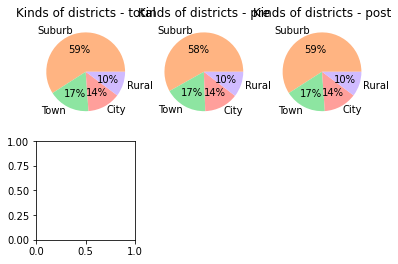

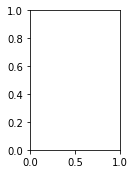

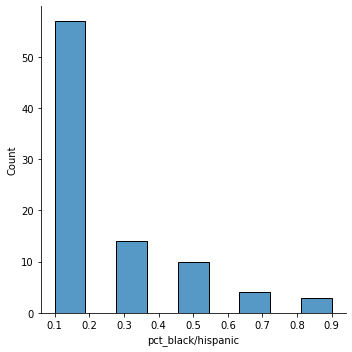

In [21]:
# District types
labels = list(merged_data['locale'].unique())
# Only after finishing this I realized that I could've just used the districts table but it was a good exercise... 😅
district_types = merged_data.groupby(by=['district_id', 'locale'], as_index=False).count()['locale'].value_counts()

district_types_pre = merged_data_pre_covid.groupby(by=['district_id', 'locale'], as_index=False).count()['locale'].value_counts()
district_types_post = merged_data_post_covid.groupby(by=['district_id', 'locale'], as_index=False).count()['locale'].value_counts()

pre_mean = merged_data_pre_covid.groupby(by=['district_id'], as_index=False).mean()['pct_black/hispanic']
post_mean = merged_data_post_covid.groupby(by=['district_id'], as_index=False).mean()['pct_black/hispanic']


# engagement_by_district = merged_data.groupby(['district_id', 'pct_black/hispanic']).agg({'engagement_index': 'mean'}).reset_index()
# print(engagement_by_district.head())

# race
# engagement_by_race = merged_data.groupby(['district', 'pct_black/hispanic']).agg({'': ''})

# social background



plt.subplot(2,3,1)

colors = sns.color_palette('pastel')[1:5]
plt.pie(district_types, labels=labels, colors=colors, autopct='%.0f%%')
plt.title('Kinds of districts - total')

plt.subplot(2,3,2)

plt.pie(district_types_pre, labels=labels, colors=colors, autopct='%.0f%%')
plt.title('Kinds of districts - pre')

plt.subplot(2,3,3)

plt.pie(district_types_post, labels=labels, colors=colors, autopct='%.0f%%')
plt.title('Kinds of districts - post')

plt.subplot(2,3,4)
sns.displot(pre_mean)
# plt.pie(black_hispanic_pre, labels=['black/hispanic', 'other'], colors=colors, autopct='%.0f%%')
# plt.title('black/hispanic - pre')

plt.subplot(2,3,5)
sns.displot(post_mean)

# sns.lineplot(data=engagement_by_district, y="pct_black/hispanic")

plt.show()

In [ ]:

# black_hispanic_post = merged_data_post_covid.groupby(by=['district_id', 'pct_black/hispanic'], as_index=False).count()['pct_black/hispanic'].value_counts()
black_hispanic_pre = merged_data_pre_covid.groupby(by=['district_id'], as_index=False).mean()['pct_black/hispanic]
# black_hispanic_pre = merged_data_pre_covid['pct_black/hispanic'].mean()
black_hispanic_pre

In [ ]:
st_acсess = merged_data.groupby(['state', 'time']).agg({'pct_access': 'mean'}).reset_index()
st_eng = merged_data.groupby(['state', 'time']).agg({'engagement_index': 'mean'}).reset_index()
# locale 
loc_acсess = merged_data.groupby(['locale', 'time']).agg({'pct_access': 'mean'}).reset_index()
loc_eng = merged_data.groupby(['locale', 'time']).agg({'engagement_index': 'mean'}).reset_index()
cat_acсess = merged_data.groupby(['Basic_category', 'time']).agg({'pct_access': 'mean'}).reset_index()
cat_eng = merged_data.groupby(['Basic_category', 'time']).agg({'engagement_index': 'mean'}).reset_index()

# for i in [st_acсess, st_eng, loc_acсess, loc_eng, cat_acсess, cat_eng]:
#     i['day_of_week'] = i['time'].dt.dayofweek

In [50]:
def create_running_average(df: pd.DataFrame, category: str, kernel_size: int=8, out_category_prefix="running_average_"):
    runn_avg_colname = f"{out_category_prefix}{category}"
    df[runn_avg_colname] = 0
    for state in df.state:
        state_mask = df.state == state
        column = df.loc[state_mask, category].values
        running_mean = np.convolve(column, np.ones(kernel_size)/kernel_size, mode="same")
        df.loc[state_mask, runn_avg_colname] = running_mean

In [14]:
st_acсess.head(3)
create_running_average(st_acсess, 'pct_access')
create_running_average(st_eng, 'engagement_index')

In [15]:
import plotly as py
import plotly.express as px

In [2]:
import mitosheet
mitosheet.sheet()

MitoWidget(analysis_name='UUID-c35e0152-bb41-44fa-9383-7a9e2f913615', code_json='{"imports": "from mitosheet i…

In [ ]:
# MITO CODE START (DO NOT EDIT)

from mitosheet import * # Import necessary functions from Mito
register_analysis('UUID-c35e0152-bb41-44fa-9383-7a9e2f913615') # Let Mito know which analysis is being run

# Imported /Users/andru/dev/__projects/data_science/kaggle/covid19-education-impact/data/districts_info.csv
import pandas as pd
districts_info_csv = pd.read_csv(r'/Users/andru/dev/__projects/data_science/kaggle/covid19-education-impact/data/districts_info.csv')

  
# MITO CODE END (DO NOT EDIT)